# Heart Disease Prediction using Logistic Regression

**Objective**: To develop a machine learning model using Logistic Regression to predict the 10-year risk of Coronary Heart Disease (CHD) in patients based on health metrics.

In [15]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Loading the dataset
df = pd.read_csv('/content/framingham.csv')

📌 **Checking dataset structure**

In [17]:
print("Dataset shape:", df.shape)

Dataset shape: (4240, 16)


In [18]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 K

In [19]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1

In [20]:
# To drop unnecessary column: 'education'

df.drop(columns=['education'], inplace=True)

In [21]:
# Renaming columns for better readability

df.rename(columns={
    'male': 'is_male',
    'age': 'age',
    'currentSmoker': 'is_current_smoker',
    'cigsPerDay': 'cigarettes_per_day',
    'BPMeds': 'blood_pressure_meds',
    'prevalentStroke': 'has_had_stroke',
    'prevalentHyp': 'has_hypertension',
    'diabetes': 'has_diabetes',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'glucose': 'glucose_level',
    'TenYearCHD': 'chd_risk'
}, inplace=True)

In [22]:
# To display cleaned-up dataframe info

print("\nCleaned DataFrame columns:")
print(df.columns.tolist())


Cleaned DataFrame columns:
['is_male', 'age', 'is_current_smoker', 'cigarettes_per_day', 'blood_pressure_meds', 'has_had_stroke', 'has_hypertension', 'has_diabetes', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose_level', 'chd_risk']


📌 **Data Preprocessing**

In [23]:
# Handle missing values by dropping rows with NaN
df_cleaned = df.dropna()

In [24]:
print("Data shape after dropping missing values:", df_cleaned.shape)

Data shape after dropping missing values: (3751, 15)


In [25]:
# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
# Features (independent variables) and target (dependent variable)
X = df_cleaned.drop(columns=['chd_risk'])
y = df_cleaned['chd_risk']

# Apply scaling to X
X_scaled = scaler.fit_transform(X)

# Optional: Convert scaled data back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [27]:
# Split the dataset: 70% training, 30% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2625, 14)
Testing set size: (1126, 14)


📌 **Exploratory Data Analysis (EDA)**

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2635248099.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chd_risk', data=df_cleaned, palette='Set2')


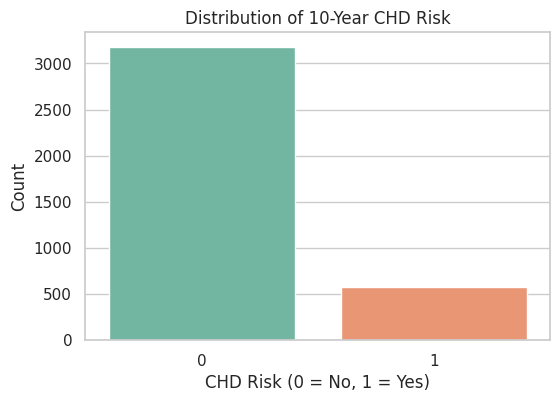

In [29]:
# To Set plot style
sns.set(style="whitegrid")

# Class Distribution: CHD = 0 or 1
plt.figure(figsize=(6,4))
sns.countplot(x='chd_risk', data=df_cleaned, palette='Set2')
plt.title('Distribution of 10-Year CHD Risk')
plt.xlabel('CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [30]:
# To Display count and percentage
chd_counts = df_cleaned['chd_risk'].value_counts()
chd_percentage = df_cleaned['chd_risk'].value_counts(normalize=True) * 100
print("CHD Risk Counts:\n", chd_counts)
print("\nCHD Risk Percentage:\n", chd_percentage.round(2))

CHD Risk Counts:
 chd_risk
0    3179
1     572
Name: count, dtype: int64

CHD Risk Percentage:
 chd_risk
0    84.75
1    15.25
Name: proportion, dtype: float64


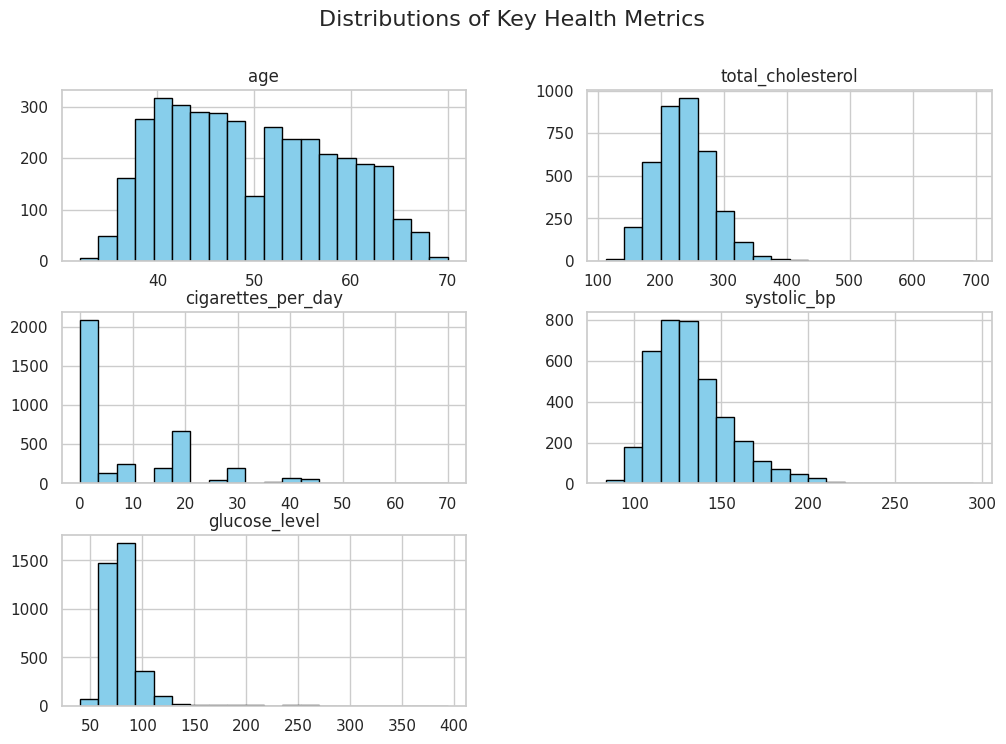

In [31]:
# Histograms of important continuous features
important_features = ['age', 'total_cholesterol', 'cigarettes_per_day', 'systolic_bp', 'glucose_level']

df_cleaned[important_features].hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Key Health Metrics', fontsize=16)
plt.show()

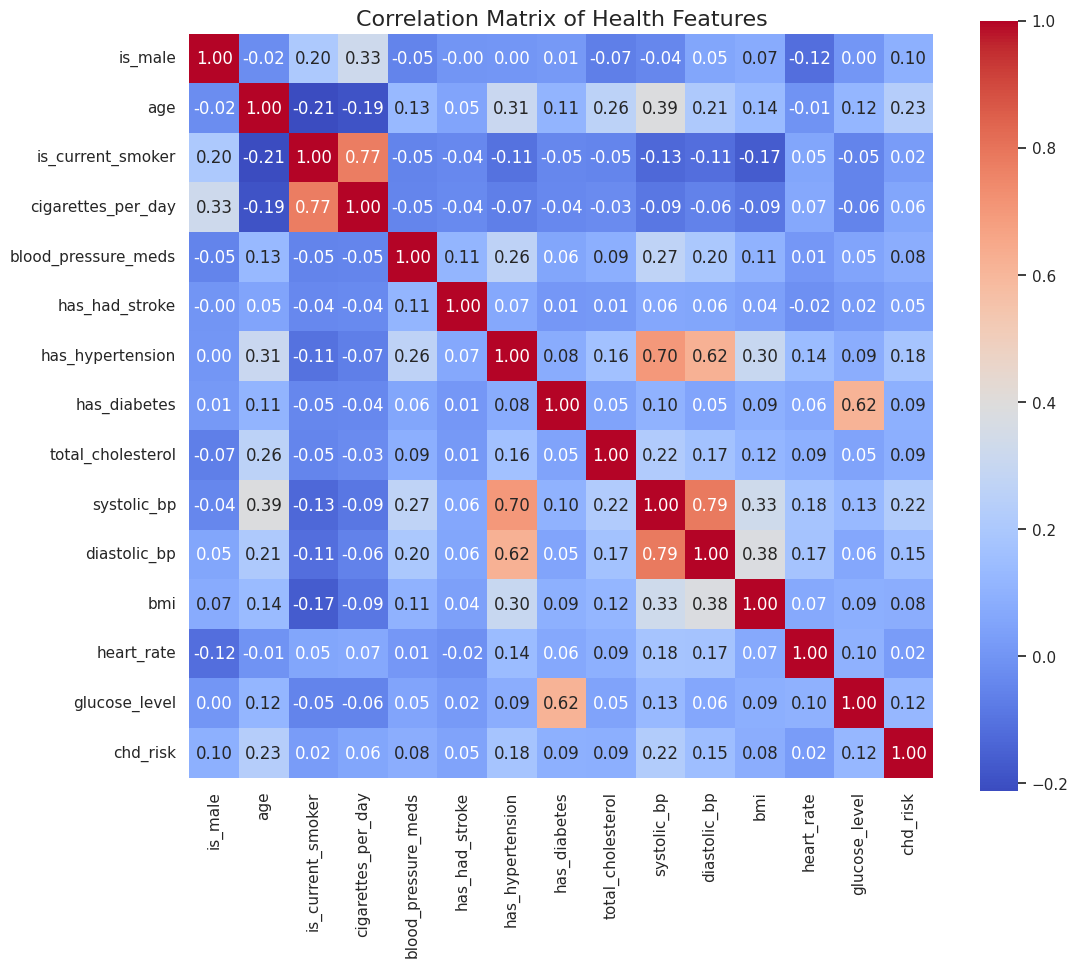

In [32]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Health Features', fontsize=16)
plt.show()

/tmp/ipython-input-1677546478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chd_risk', y=feature, data=df_cleaned, palette='Set3')
/tmp/ipython-input-1677546478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chd_risk', y=feature, data=df_cleaned, palette='Set3')
/tmp/ipython-input-1677546478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chd_risk', y=feature, data=df_cleaned, palette='Set3')
/tmp/ipython-input-1677546478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

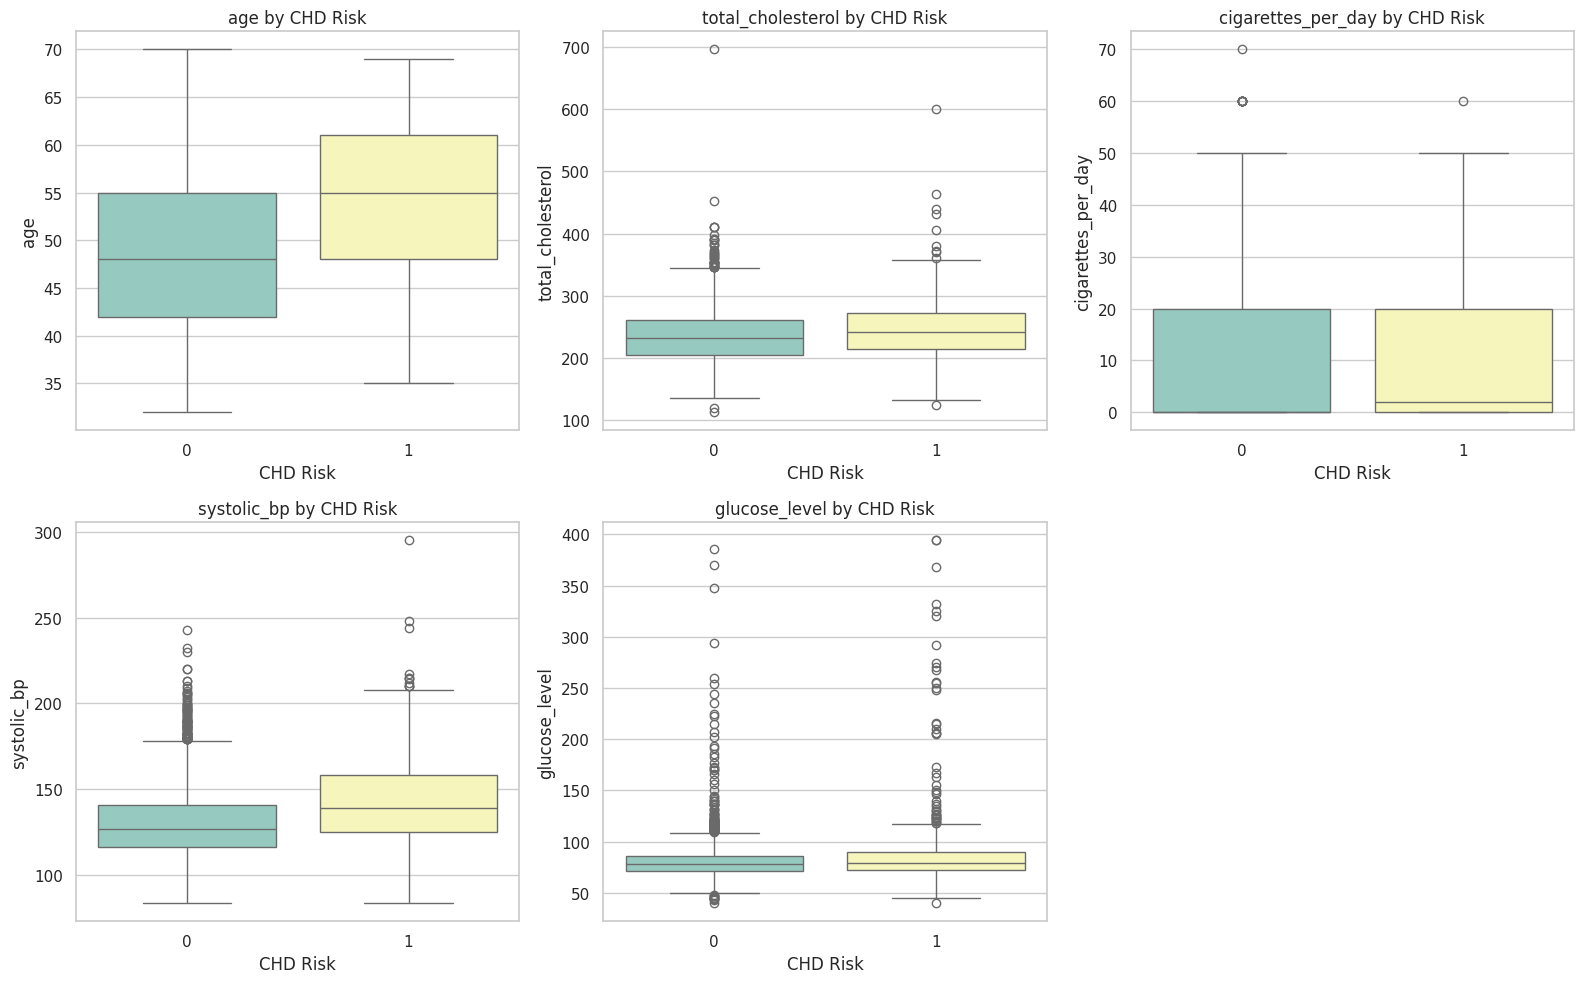

In [33]:
# Risk Factor Analysis: Boxplots by CHD Risk
risk_factors = ['age', 'total_cholesterol', 'cigarettes_per_day', 'systolic_bp', 'glucose_level']

plt.figure(figsize=(16,10))
for i, feature in enumerate(risk_factors, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='chd_risk', y=feature, data=df_cleaned, palette='Set3')
    plt.title(f'{feature} by CHD Risk')
    plt.xlabel('CHD Risk')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [34]:
# Oversampling minority class using SMOTE:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


📌 **Logistic Regression Model Training (with SMOTE Resampled Data)**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# To Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [36]:
# To Train the model on the SMOTE-resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# To Predict on the original test data
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [41]:
# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy Score: 0.6767317939609236

ROC-AUC Score: 0.7309797181999903


📌**Model Evaluation and Prediction**

In [39]:
# Model Evaluation Code

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve

# To Predict on the original test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

#  Accuracy
accuracy = accuracy_score(y_test, y_pred)

#  Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#  ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# To Print evaluation results
print("Model Evaluation Results:")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)

Model Evaluation Results:
Accuracy      : 0.6767
Precision     : 0.2725
Recall        : 0.6686
F1-Score      : 0.3872
ROC-AUC Score : 0.7310

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       954
           1       0.27      0.67      0.39       172

    accuracy                           0.68      1126
   macro avg       0.60      0.67      0.58      1126
weighted avg       0.82      0.68      0.72      1126

Confusion Matrix:
 [[647 307]
 [ 57 115]]


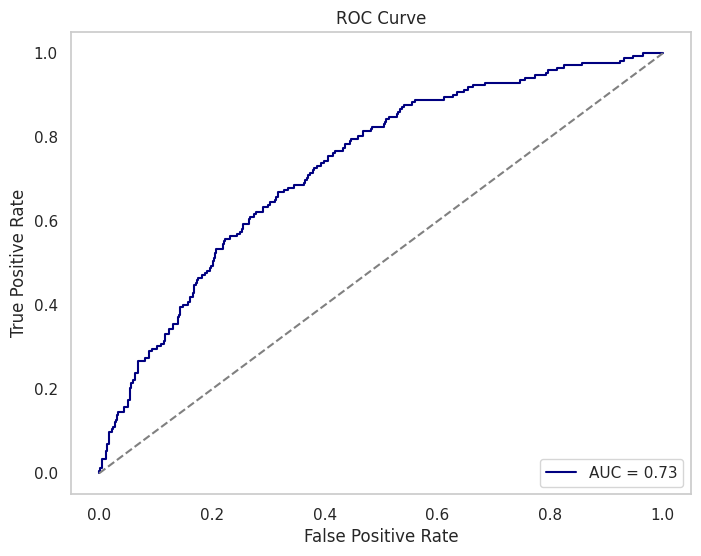

In [40]:
# To Plot ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [42]:
# To Predict New Patient Data

# Example new patient data (replace with real values):
# Format: [is_male, age, is_current_smoker, cigarettes_per_day, blood_pressure_meds,
#          has_had_stroke, has_hypertension, has_diabetes, total_cholesterol, systolic_bp,
#          diastolic_bp, bmi, heart_rate, glucose_level]

new_patient = np.array([[1, 55, 1, 15, 0, 0, 1, 0, 240, 130, 85, 28.5, 72, 115]])

# Scale using the same StandardScaler used earlier
new_patient_scaled = scaler.transform(new_patient)

# To Predict probability and class
risk_prob = log_reg.predict_proba(new_patient_scaled)[0][1]
risk_class = log_reg.predict(new_patient_scaled)[0]

print(f"\nPredicted CHD Risk (Probability): {risk_prob:.4f}")
print(f"Predicted CHD Risk (Class)      : {'High Risk (1)' if risk_class == 1 else 'Low Risk (0)'}")


Predicted CHD Risk (Probability): 0.7005
Predicted CHD Risk (Class)      : High Risk (1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Conclusion:**

This model helps in early heart disease detection using key health indicators.